# Comenzamos primero con la carga de librerias necesarias para el entrenamiento del modelo

In [1]:
import pandas
import matplotlib.pyplot as plt
import keras
import numpy as np
import tensorflow.keras.optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


# Primer preprocesamiento simple, acorde al TP1

In [2]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion

df, df_holdout = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)


# acá solo convierto simplemente a numerico.. primer preprocessing!
X_df = conversion_numerica(X_df) 


Aplicando 'conversion_numerica' en las variables categóricas.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

## Por el momento solo aplico ese primer preprocesamiento

In [4]:
X_df

,anios_estudiados,edad,educacion_alcanzada,suma_declarada_bolsa_argentina,horas_trabajo_registradas,genero_mujer,estado_marital_matrimonio_civil,estado_marital_matrimonio_militar,estado_marital_pareja_no_presente,estado_marital_separado_a,...,categoria_de_trabajo_sin_trabajo,categoria_de_trabajo_trabajo_voluntariado,religion_budismo,religion_cristianismo,religion_judaismo,religion_otro,rol_familiar_registrado_con_hijos,rol_familiar_registrado_otro,rol_familiar_registrado_sin_familia,rol_familiar_registrado_soltero_a
0,17,39,5,2174,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,17,50,5,0,13,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13,38,4,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,11,53,3,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,17,28,5,0,40,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,5,0,38,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32557,13,40,4,0,40,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32558,13,58,4,0,40,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,13,22,4,0,20,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# En primer lugar diseño la red

In [5]:
num_classes = 2

model = Sequential()
model.add(Dense(8,input_shape = (40,),activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


# Ya tengo el primer modelo compilado voy a entrenarlo

In [6]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [7]:
history = model.fit(X_train.values, y_train,epochs=50,verbose=0,validation_data=(X_test.values, y_test))

# Grafico evolución en función de epocs

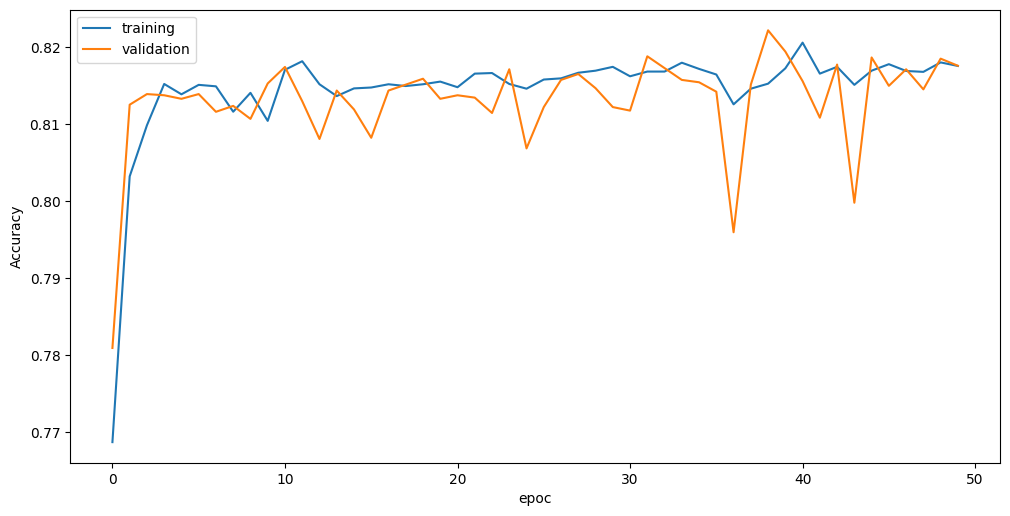

In [8]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

# Busco bajar el learning rate porque esta over shootiando, poner mas epocs y regularizo también

In [9]:
from keras.regularizers import l2

In [10]:
num_clases = 2
model = Sequential()
model.add(Dense(16, input_shape=(40,), activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_clases, activation="softmax"))





In [11]:
#opt = RMSprop(lr=0.0001)
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',"AUC"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                656       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
Total params: 838
Trainable params: 838
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train.values, y_train,verbose = 1,epochs = 100,validation_data=(X_test.values, y_test))

Epoch 1/100
814/814 [==============================] - 2s 1ms/step - loss: 5.2003 - accuracy: 0.3509 - auc: 0.3840 - val_loss: 0.7490 - val_accuracy: 0.7652 - val_auc: 0.8022
Epoch 2/100
814/814 [==============================] - 1s 1ms/step - loss: 0.6525 - accuracy: 0.7783 - auc: 0.8227 - val_loss: 0.5278 - val_accuracy: 0.7811 - val_auc: 0.8597
Epoch 3/100
814/814 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7861 - auc: 0.8506 - val_loss: 0.4892 - val_accuracy: 0.7943 - val_auc: 0.8675
Epoch 4/100
814/814 [==============================] - 1s 1ms/step - loss: 0.5034 - accuracy: 0.7960 - auc: 0.8671 - val_loss: 0.4526 - val_accuracy: 0.8128 - val_auc: 0.8926
Epoch 5/100
814/814 [==============================] - 1s 1ms/step - loss: 0.4661 - accuracy: 0.8109 - auc: 0.8846 - val_loss: 0.4852 - val_accuracy: 0.8059 - val_auc: 0.8807
Epoch 6/100
814/814 [==============================] - 1s 1ms/step - loss: 0.4496 - accuracy: 0.8157 - auc: 0.8935 - val_loss

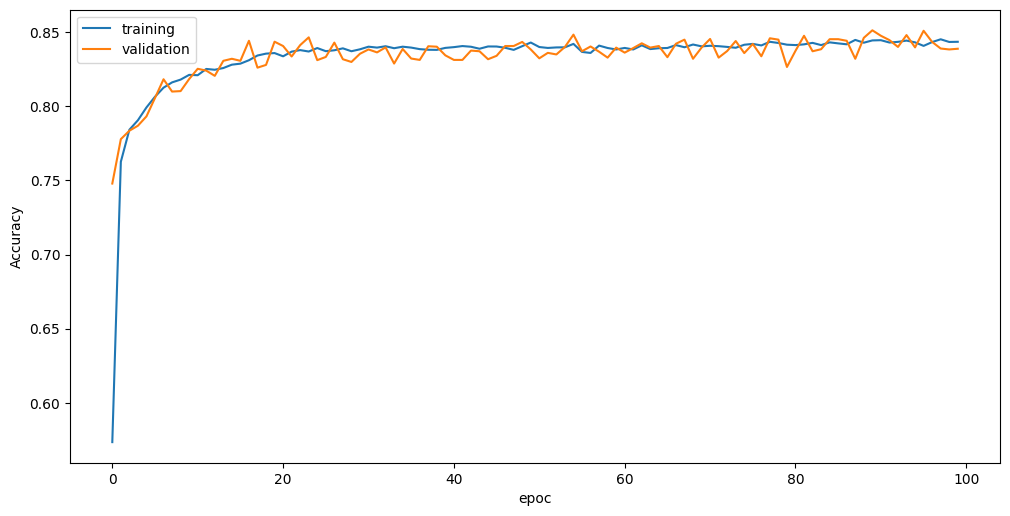

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

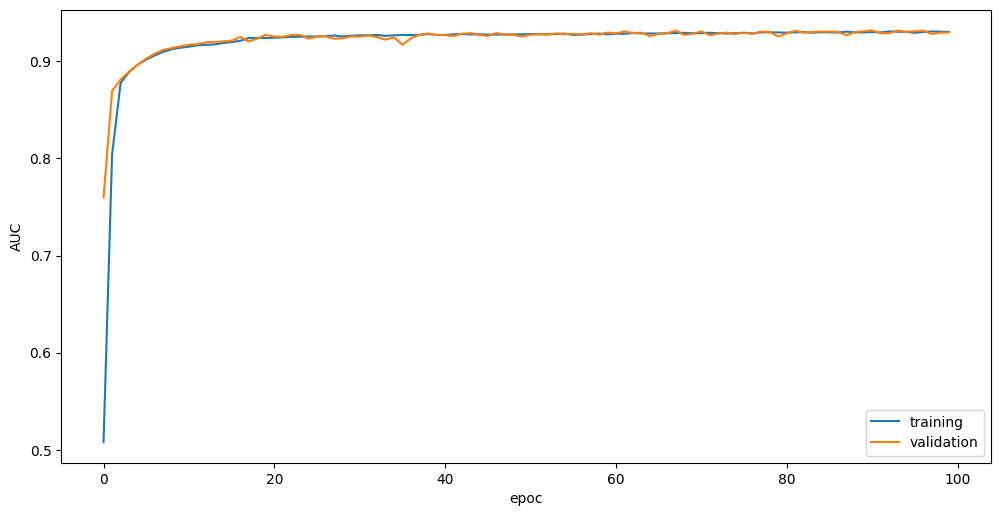

In [14]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("AUC")
plt.xlabel("epoc")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="validation")
plt.legend()

In [15]:
y_test =  y_test[:,1]


In [22]:
y_train = y_train[:,1]

In [17]:
#y_pred = model.predict(X_test)[:,1]

In [32]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [26]:
y_test

array([0., 1., 0., ..., 0., 1., 1.], dtype=float32)

In [27]:
y_train

array([0., 1., 1., ..., 1., 0., 0.], dtype=float32)

AUC-ROC score sobre test:  0.8989031128123646
AUC-ROC score sobre train:  0.8995022715899801
Accuracy sobre test:  0.8387839705204975
              precision    recall  f1-score   support

  Bajo valor       0.93      0.87      0.90      5283
  Alto valor       0.56      0.71      0.62      1230

    accuracy                           0.84      6513
   macro avg       0.74      0.79      0.76      6513
weighted avg       0.86      0.84      0.85      6513



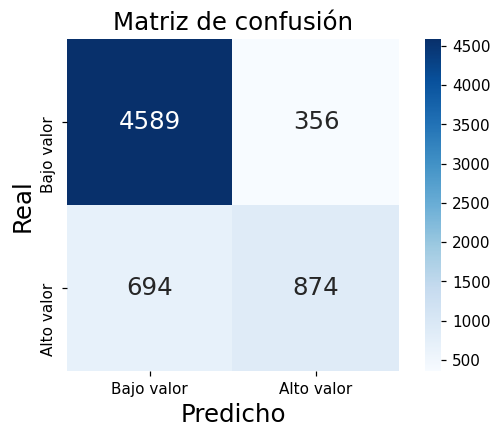

/home/axel/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/home/axel/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


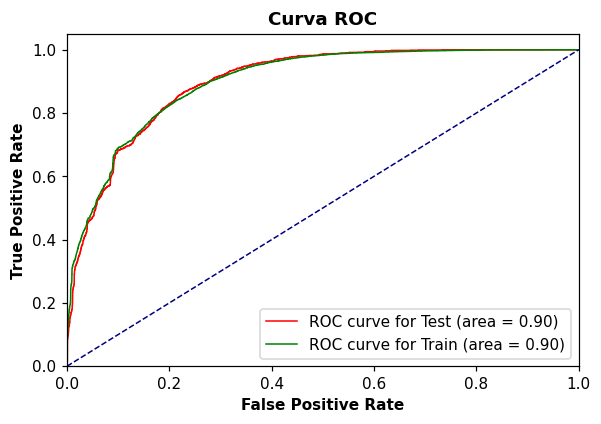

In [34]:
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, model.predict(X_test)[:,1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, model.predict(X_train)[:,1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(model, X_test, y_test, X_train, y_train)

In [ ]:
prediccion = model.predict(X_train)

In [ ]:
prediccion[:20]

# Conclusion parcial

Como dato: probe varios optimizadores y varios learning rates y varias configuraciones de redes. El optimizador es este o el adam. El learning rate mas chicho no sirve y mas grande overshootea mucho. La red si la complejizas mas se va todo a la mierda rapidamente

Visualizando lo obtenido identificamos que empeoro notablemente. Y no solo empeoro sino que la red es completamente inútil ya que su output es siempre o casi siempre 0 (bajos ingresos). No nos explayaremos en la explicación teórica de este fenómeno pero es algo que entedemos puede suceder al usar función de activación Relu en las neuronas. Basicamente sucede que a partir de cierto punto la red "muere" y se vuelve inservible. Dejamos una discusión de referencia en el siguiente link: https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks

Para buscar solucionar este problema empecemos probando un método de regularización de la red. Es valido aclarar que otras posibles soluciones podrian ser modificar el optimizador e cambiar el learning rate 

In [6]:
clf_2 = tree.DecisionTreeClassifier(random_state=10, criterion = 'gini', max_depth = 7, min_samples_leaf =50)
X_reducido = reduccion_rfecv(
    estimator=clf_2,
    X_df = X_df,
    y_df = y_df,
    min_features_to_select=20,
    step=5,
    n_jobs=-1,
    scoring="roc_auc",
    cv=5
)

X_reducido = get_dataframe_polynomial(X_reducido, 2, False)
X_train, X_test, y_train, y_test = train_test_split(X_reducido, y_df, random_state=10, test_size=0.20, stratify=y_df)
X_train = get_dataframe_scaled(X_train,StandardScaler())
X_test = get_dataframe_scaled(X_test,StandardScaler())
clf_2 = GradientBoostingClassifier(random_state=10,max_depth=7,min_samples_leaf=50)

Dataset inicial con 20 features...
Dataset nuevo con PolynomialFeature con 30 features...


### Quinto entrenamiento

#### Diseño

Ahora agrandamos la red

In [5]:
seed(0)
tensorflow.random.set_seed(0)

In [6]:
model = Sequential()
model.add(Dense(16,input_shape = (40,),activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(16,activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(8,activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(4,activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(1, activation="sigmoid"))

Compilamos y mostramos un resumen de la red

In [7]:
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['AUC','accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                656       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


Tenemos 1200 params, mientrás que anteriormente teniamos aproximadamente 800

In [8]:
history = model.fit(X_train.values, y_train,epochs=200,verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/200
814/814 [==============================] - 2s 2ms/step - loss: 6.9633 - auc: 0.5235 - accuracy: 0.7032 - val_loss: 0.5430 - val_auc: 0.6671 - val_accuracy: 0.7883
Epoch 2/200
814/814 [==============================] - 1s 1ms/step - loss: 0.5426 - auc: 0.6560 - accuracy: 0.7906 - val_loss: 0.4781 - val_auc: 0.7468 - val_accuracy: 0.7940
Epoch 3/200
814/814 [==============================] - 1s 1ms/step - loss: 0.4726 - auc: 0.7591 - accuracy: 0.7948 - val_loss: 0.4432 - val_auc: 0.8245 - val_accuracy: 0.7915
Epoch 4/200
814/814 [==============================] - 1s 1ms/step - loss: 0.4311 - auc: 0.8151 - accuracy: 0.7974 - val_loss: 0.4187 - val_auc: 0.8421 - val_accuracy: 0.7935
Epoch 5/200
814/814 [==============================] - 1s 1ms/step - loss: 0.4240 - auc: 0.8330 - accuracy: 0.7918 - val_loss: 0.4065 - val_auc: 0.8546 - val_accuracy: 0.7940
Epoch 6/200
814/814 [==============================] - 1s 1ms/step - loss: 0.4041 - auc: 0.8478 - accuracy: 0.7991 - val_loss

#### Métricas

Obtenemos las curvas de aprendizaje y demás metricas para establecer conclusiones

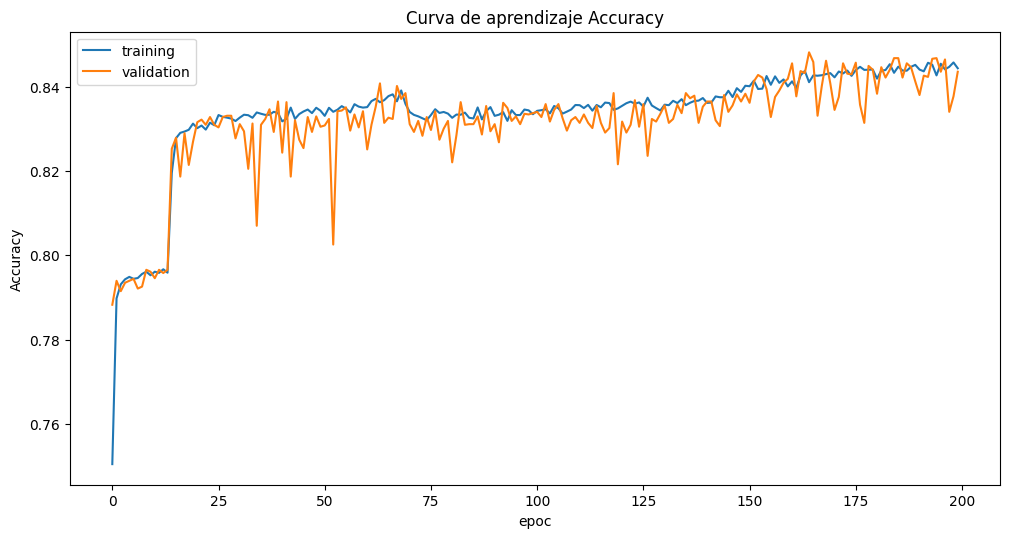

In [9]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("Curva de aprendizaje Accuracy")
plt.legend()
plt.show()

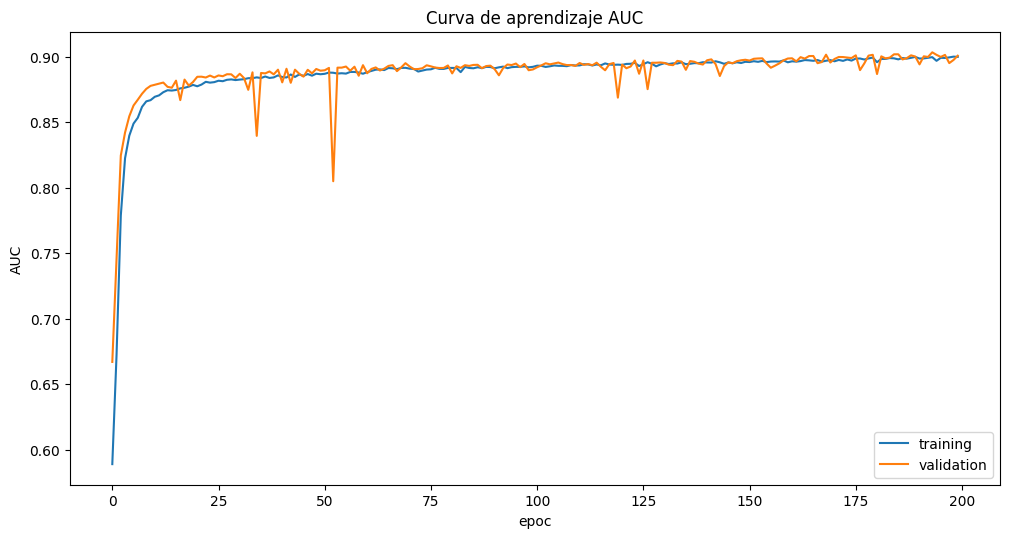

In [10]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("AUC")
plt.xlabel("epoc")
plt.plot(history.history["auc"], label="training")
plt.plot(history.history["val_auc"], label="validation")
plt.title("Curva de aprendizaje AUC")
plt.legend()
plt.show()

AUC-ROC score sobre test:  0.9007239068529334
AUC-ROC score sobre train:  0.9026233876527804
Accuracy sobre test:  0.8435436818670352
              precision    recall  f1-score   support

  Bajo valor       0.92      0.88      0.90      5176
  Alto valor       0.60      0.71      0.65      1337

    accuracy                           0.84      6513
   macro avg       0.76      0.79      0.77      6513
weighted avg       0.85      0.84      0.85      6513



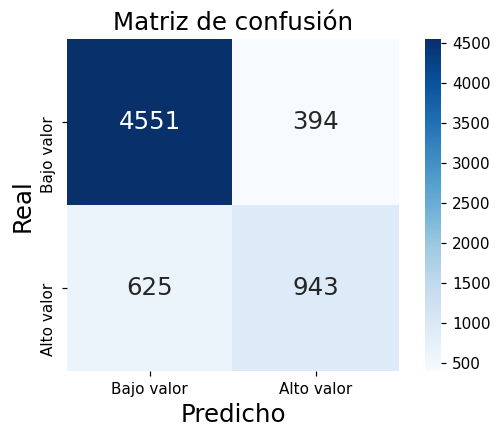

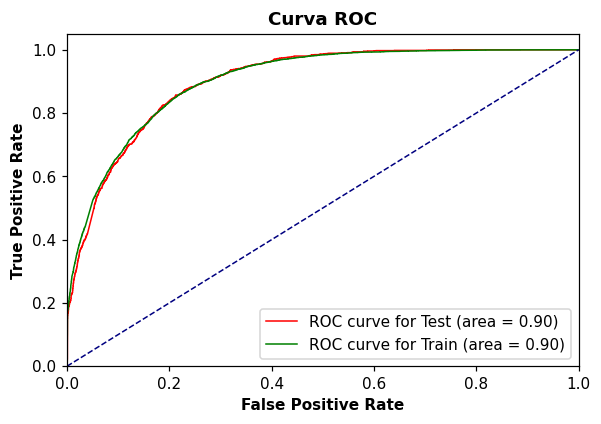

In [11]:
y_pred = model.predict(X_test).round()
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, model.predict(X_test)))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, model.predict(X_train)))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves_red(model, X_test, y_test, X_train, y_train)

Observamos que practicamente no hubo cambios